## **HATE SPEECH DETECTION ON TELEGRAM**

In [1]:
# Basic Python package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

In [18]:
# Provide the path to your TSV file
file_path = '//content/ghc_train.tsv'

# Load the TSV file into a DataFrame
df = pd.read_csv(file_path, sep='\t')


**DATA** **VISUALISATION**

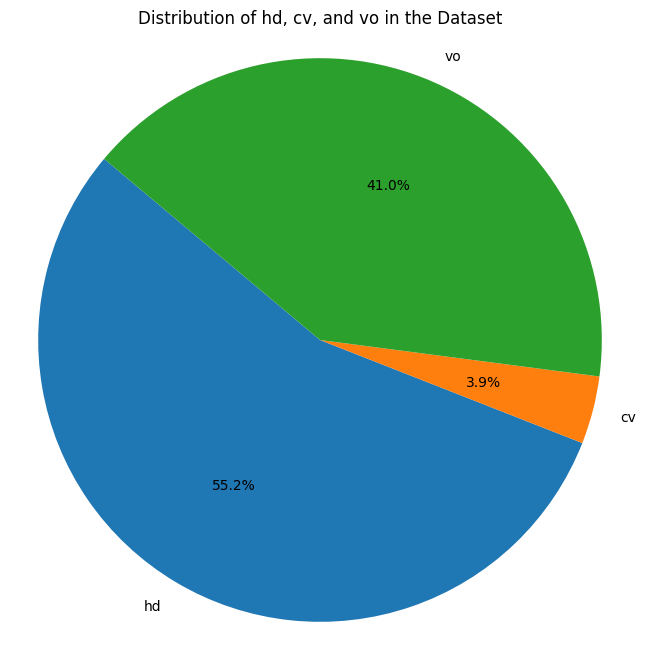

In [3]:
import matplotlib.pyplot as plt

# Sum the values of each column
hd_sum = df['hd'].sum()
cv_sum = df['cv'].sum()
vo_sum = df['vo'].sum()

# Create a list of sums and corresponding labels
sums = [hd_sum, cv_sum, vo_sum]
labels = ['hd', 'cv', 'vo']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sums, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of hd, cv, and vo in the Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# **DATA CLEANING**

REMOVING DUPLICATES

In [4]:
# removing the duplicates and keeing just the first occurrence
df = df.drop_duplicates()

PUNCTUATION REMOVAL

In [5]:
# Remove punctuations and symbols
def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', "", string.punctuation))
    return text
# Apply the function to all string cells in the DataFrame
df = df.applymap(remove_punctuation)

DOUBLE QUOTE REMOVAL

In [6]:
#removing double quotes
import re

def remove_quotes(text):
    if isinstance(text, str):
        return re.sub(r'[“”]', '', text)
    else:
        return text

df = df.applymap(remove_quotes)

STOPWORD REMOVAL

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#stopwords are commonly used words in a language that are often ignored  or filtered out in natural language processing
#tasks beacuase they carry less meaningful information compared to other words
# Download the necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

# Define a function to remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        return ' '.join([word for word in words if word.lower() not in stop_words])
    return text

# Function to process a chunk
def process_chunk(chunk):
    return chunk.applymap(remove_stopwords)

# Process the train dataset in chunks
train_processed_chunks = []
chunk_size = 21976
for chunk in pd.read_csv(file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    train_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for train data
df_cleaned = pd.concat(train_processed_chunks, ignore_index=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'here', "aren't", "hadn't", 'yourselves', 'wouldn', 'don', 'we', 'did', 'under', 'if', 'after', 'its', 'not', 'hasn', 'same', 'now', 'isn', 'between', 'mightn', 'our', 'before', 'about', 'down', 'ours', 'himself', 'for', 'ma', "that'll", 'is', 'or', "you'd", 'above', 'below', 'can', 'll', 'yours', 'when', 'at', 'each', 'so', 'once', 'most', 'themselves', 'how', 'nor', 'than', 'd', 'm', "needn't", 'hers', 'do', 'just', 'won', 'only', 'no', 'theirs', 'while', 'does', 'he', 'an', 'itself', 'y', 'of', 'to', "should've", 'will', "won't", 'him', 'in', 'being', 'them', 'more', "couldn't", "mustn't", 'into', 'through', 'i', "hasn't", 'be', 'until', 'all', 's', "don't", 'own', 'doing', 'there', 't', 'couldn', 'should', 'needn', "mightn't", "it's", 'those', 'yourself', "she's", 'where', 'wasn', 'was', 'up', 'haven', 'are', 'had', 'from', 'against', 'some', 've', 'on', "shouldn't", 'have', 'myself', "isn't", 'his', 'as', 'any', 'it', 'a', 'off', 'ourselves', 'hadn', 'my', 'too', 'who', 'by', 'du

STEMMING

In [9]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

#Stemming is an NLP technique used to reducce words to their base or root form.
#for eg, the words "running", "runner", and "ran" can all be reduced to the stem "run"

# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Define a function to perform stemming
def stem_text(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        return ' '.join([stemmer.stem(word) for word in words])
    return text

# Function to process a chunk
def process_chunk(chunk):
    return chunk.applymap(stem_text)

# Process the train dataset in chunks
train_processed_chunks = []
chunk_size = 21976
for chunk in pd.read_csv(file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    train_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for train data
df= pd.concat(train_processed_chunks, ignore_index=True)

# Display a few rows of the cleaned train DataFrame
print("Cleaned DataFrame:")
print(df.head())



Cleaned DataFrame:
                                                text  hd  cv  vo
0  he most like convert to islam due to hi natur ...   0   0   0
1  so ford lie about be a psychologist . record s...   0   0   0
2           job . educ . end abus of nation . ca43 .   0   0   0
3  i share a lot of your valu , & like mani who d...   0   0   0
4  i am so readi to get back to blog ! www.benbri...   0   0   0


LEMMITIZATION

In [10]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [12]:
#Lemmitization ia a NLP technique that invloves reducing words to thier base or dictionary form, known as the lemma.
#eg: words: "running", "ran", "runs" ..... lemma:"run"

import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download the necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to perform lemmatization
def lemmatize_text(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        return ' '.join([lemmatizer.lemmatize(word) for word in words])
    return text

# Function to process a chunk
def process_chunk(chunk):
    return chunk.applymap(lemmatize_text)

# Process the train dataset in chunks
train_processed_chunks = []
chunk_size = 21976
for chunk in pd.read_csv(file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    train_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for train data
df_cleaned = pd.concat(train_processed_chunks, ignore_index=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


ADDING A NEW COLUMN CALLED LABEL

In [13]:
#As hd cv and vo are the types of hatespeech so the additional column called label will tell whether the text we have is hate speech or not
# Adding 'label' column
df['label'] = ((df['hd'] == 1) | (df['cv'] == 1) | (df['vo'] == 1)).astype(int)



URL Removal , Hastags & Mentions

In [14]:
# removing urls,hastags and mentions
def remove_urls_mentions_hashtags(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    return text
df['text'] = df['text'].apply(remove_urls_mentions_hashtags)

EMOJI REMOVAL

In [15]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 6.2 MB/s eta 0:00:00


In [16]:
#emoji removal
import pandas as pd
import emoji

# Define a function to replace emoji codes with descriptive text
def replace_emojis(text):
    return emoji.demojize(text)

# Replace emoji codes in a specific column (e.g., 'text_column')
df['text'] = df['text'].apply(replace_emojis)


LOWERCASING

In [17]:
df['text']=df['text'].str.lower()

SAVING THE CLEANED DATASET

In [ ]:
# saving the cleaned data
clean_train_file_path = r'C:\Users\prits\Downloads\Data\clean_ghc_train.csv'
train_df.to_csv(clean_train_file_path, sep=',', index=False)

# **Import Libraries**

IMORTING CLEANED DATASET

In [21]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from transformers import BertTokenizer, BertModel
import torch

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("/content/cleaned_ghc_train.csv")


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

df['text'] = df['text'].fillna('')

In [24]:
y = df['label']
X=df['text']

In [25]:
#spliting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# **FINAL DEEP LEARNING MODEL**

# **Bert With LSTM**

Here i have tried using bert embeedings that is passed to 3 Biderectional LSTM model.
The reason i have chosen bidirectional LSTM because bidirectional LSTM processes the sequence in both forward and backward directions, capturing information from both past and future contexts. This allows the model to have a more comprehensive understanding of the context.

BERT embeddings and tokenization helps in contextual understanding of a sentence.

# **BERT** **TOKENISER**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import BertTokenizer, TFBertModel

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Tokenize and encode the text data
def encode_texts(texts, tokenizer, max_length=100):
    encodings = tokenizer(
        texts.tolist(),
        truncation=True,
        padding='max_length',
        max_length=max_length,
        return_tensors='tf'
    )
    return encodings

# Encode the training and test data
X_train_encodings = encode_texts(X_train, tokenizer, max_length=50)  # Reduced max_length
X_test_encodings = encode_texts(X_test, tokenizer, max_length=50)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

# **BERT** **EMBEDDINGS**

In [ ]:
# Extract BERT embeddings
def get_bert_embeddings(encodings, bert_model):
    outputs = bert_model(encodings['input_ids'], attention_mask=encodings['attention_mask'])
    return outputs.last_hidden_state

# Reduce the batch size
batch_size = 16

X_train_embeddings = []
for i in range(0, len(X_train_encodings['input_ids']), batch_size):
    batch_encodings = {key: val[i:i+batch_size] for key, val in X_train_encodings.items()}
    batch_embeddings = get_bert_embeddings(batch_encodings, bert_model)
    X_train_embeddings.append(batch_embeddings)
X_train_embeddings = tf.concat(X_train_embeddings, axis=0)

X_test_embeddings = []
for i in range(0, len(X_test_encodings['input_ids']), batch_size):
    batch_encodings = {key: val[i:i+batch_size] for key, val in X_test_encodings.items()}
    batch_embeddings = get_bert_embeddings(batch_encodings, bert_model)
    X_test_embeddings.append(batch_embeddings)
X_test_embeddings = tf.concat(X_test_embeddings, axis=0)
# Compute class weights
#class weights are calculated based on the frequency of each class in the training data. Classes with fewer samples get higher weights.
#The compute_class_weight function in scikit-learn calculates these weights using the formula.since for large datset it is complex to manually calculate the weights and assing them, this function of sklearn helps in doing it.
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)#calculates the weights for each class in a way that balances the dataset.
class_weights_dict = dict(enumerate(class_weights))

# **MODEL**

**Biderectional** **LSTM**

In [ ]:
# Define the model
model = Sequential()

# LSTM layers
model.add(Bidirectional(LSTM(units=256, return_sequences=True, input_shape=(X_train_embeddings.shape[1], X_train_embeddings.shape[2]))))
model.add(Dropout(0.5))  # Add Dropout for preventing overfitting

# Additional LSTM layer
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(Dropout(0.3))  # Decrease dropout value
# Another LSTM layer
model.add(Bidirectional(LSTM(units=64)))
model.add(Dropout(0.2))  # Decrease Droupout value

# Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


**Adding** **Early** **Stopping**

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

**Traing** **the** **model**

In [ ]:
# Train the model with early stopping and class weights
history = model.fit(X_train_embeddings, y_train, epochs=5, batch_size=batch_size,
                    validation_data=(X_test_embeddings, y_test),
                    class_weight=class_weights_dict,
                    callbacks=[early_stopping])

Epoch 1/5
1089/1089 [==============================] - 546s 494ms/step - loss: 0.5408 - accuracy: 0.7272 - val_loss: 0.4426 - val_accuracy: 0.8200
Epoch 2/5
1089/1089 [==============================] - 610s 561ms/step - loss: 0.4794 - accuracy: 0.7775 - val_loss: 0.3360 - val_accuracy: 0.8492
Epoch 3/5
1089/1089 [==============================] - 423s 389ms/step - loss: 0.4464 - accuracy: 0.7871 - val_loss: 0.4511 - val_accuracy: 0.8012
Epoch 4/5
1089/1089 [==============================] - 422s 388ms/step - loss: 0.4125 - accuracy: 0.7958 - val_loss: 0.5138 - val_accuracy: 0.7851
Epoch 5/5
1089/1089 [==============================] - 460s 423ms/step - loss: 0.3781 - accuracy: 0.8075 - val_loss: 0.5586 - val_accuracy: 0.7454


**Evaluation** **on** **test** **set**

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_embeddings, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Predict the labels for the test set
y_pred = model.predict(X_test_embeddings)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

137/137 - 11s - loss: 0.4210 - accuracy: 0.7961 - 11s/epoch - 82ms/step

Test accuracy: 0.7961432337760925
137/137 [==============================] - 7s 53ms/step


**Visualising** **the** **Result**

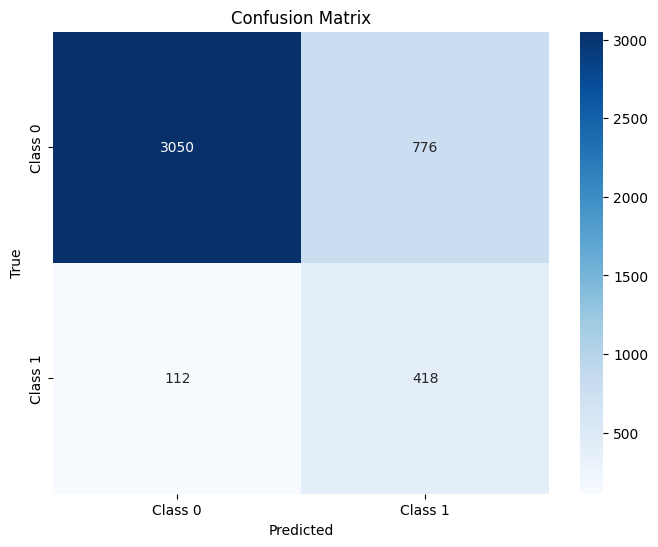

              precision    recall  f1-score   support

     Class 0       0.96      0.80      0.87      3826
     Class 1       0.35      0.79      0.48       530

    accuracy                           0.80      4356
   macro avg       0.66      0.79      0.68      4356
weighted avg       0.89      0.80      0.83      4356



In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1']))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc
# Calculate and print additional metrics
accuracy = accuracy_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.7961432506887053
Recall: 0.7886792452830189
Precision: 0.3500837520938023
F1 Score: 0.48491879350348027
ROC AUC Score: 0.87850900985314


This model gives the highest ROC AUC score among all other dl model and also gives better result than ml model.The recall tells that the model is able to predict the actual two classes correctly at a good rate.

The key metric i am considering is Recall as it tells what is the percentage of the actual value that is predicted correctly at what percentage.Higher percentage of each class means it is predicting the class correctly.

In our model overall Recall is 78% which is good and it is highest recall i got comparing to all other deep learning models and machine learning models.
Also the recall of both the classes are almost balanced which is a good sign for a good model

# **PREDICTION OF THE TEXT**

In [ ]:
def predict_hate_speech_multiple(sentences, tokenizer, bert_model, trained_model, max_length=50, batch_size=16):
    Tokenize and encode the input sentences
    encodings = tokenizer(
        sentences,
        truncation=True,
        padding='max_length',
        max_length=max_length,
        return_tensors='tf'
    )

    #Extract BERT embeddings for the input sentences
    embeddings = []
    for i in range(0, len(encodings['input_ids']), batch_size):
        batch_encodings = {key: val[i:i+batch_size] for key, val in encodings.items()}
        batch_embeddings = get_bert_embeddings(batch_encodings, bert_model)
        embeddings.append(batch_embeddings)
    embeddings = tf.concat(embeddings, axis=0)

    # : Use the trained model to predict the labels
    predictions = trained_model.predict(embeddings)
    predicted_classes = (predictions > 0.5).astype("int32")

    # Map predictions to labels
    labels = ["Hate Speech" if cls == 1 else "Not Hate Speech" for cls in predicted_classes]

    return labels

# Example usage
input_sentences = [
    "saudi money rules the youk while zionist money runs the eyou we are in the middle of a shit sandwich",
    "imagine how many famous people may not have existed if abortions had always been so available ",
    "see how this works there isnt anything more fucked up than this i think its time to really throw every single one of the motherfuckers out and begin fresh"
]
predictions = predict_hate_speech_multiple(input_sentences, tokenizer, bert_model, model)
for sentence, prediction in zip(input_sentences, predictions):
    print(f"Sentence: '{sentence}' is classified as: {prediction}")


1/1 [==============================] - 0s 103ms/step
Sentence: 'saudi money rules the youk while zionist money runs the eyou we are in the middle of a shit sandwich' is classified as: Hate Speech
Sentence: 'imagine how many famous people may not have existed if abortions had always been so available ' is classified as: Not Hate Speech
Sentence: 'see how this works there isnt anything more fucked up than this i think its time to really throw every single one of the motherfuckers out and begin fresh' is classified as: Hate Speech
